### Calculate the Word Mover's Distance between two sentences

In [1]:
import gensim.downloader as api
import glob
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

sys.path.append("../../../../utils")
from absolute_path_builder import AbsolutePathBuilder

In [2]:
sns.set()

### Read demographic groups' sentences

In [3]:
# input_path = AbsolutePathBuilder.get_path(
#     f"07_coraal_vs_buckeye_wmd",
#     filepaths="../../../../config/filepaths.yaml"
# )

# input_path = AbsolutePathBuilder.get_path(
#     f"07_youtube_wmd",
#     filepaths="../../../../config/filepaths.yaml"
# )

input_path = AbsolutePathBuilder.get_path(
    f"07_twitter_wmd",
    filepaths="../../../../config/filepaths.yaml"
)

In [4]:
dfs = [pd.read_csv(file) for file in glob.glob(os.path.join(input_path, "*"))]

In [5]:
df = pd.concat(dfs, ignore_index=False)

del dfs

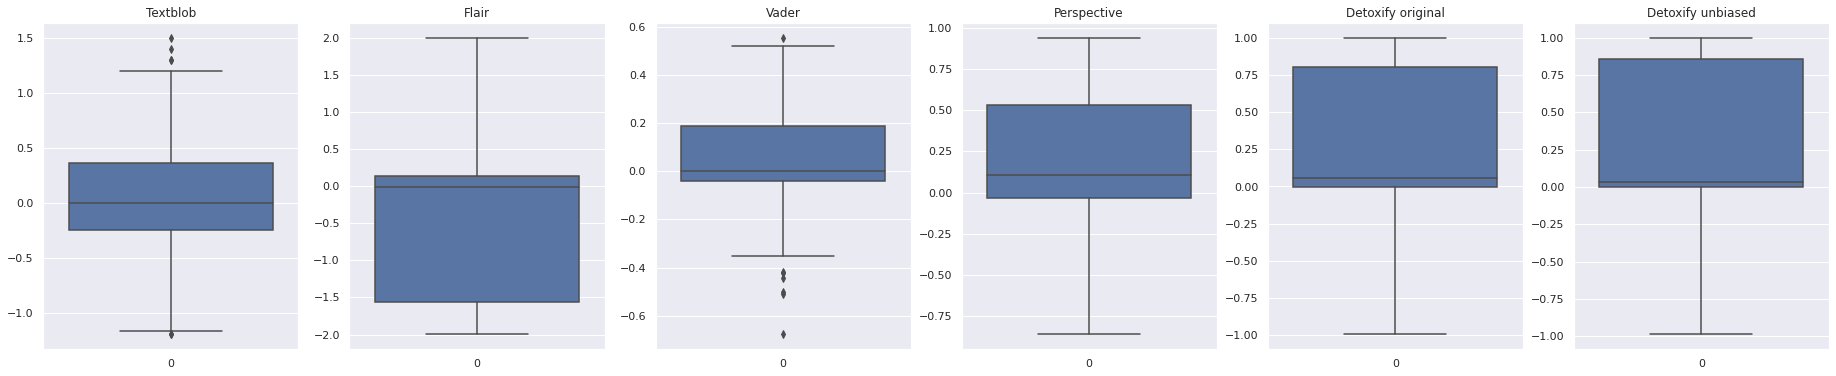

In [6]:
fig, axs = plt.subplots(1, 6, figsize=(32, 6))

for i, model in enumerate([
    "textblob",
    "flair",
    "vader",
    "perspective",
    "detoxify_original",
    "detoxify_unbiased",
]):
    df_tmp = df[["wmd", f"{model}_score_black", f"{model}_score"]].copy()
    df_tmp.loc[:, "diffs"] = df_tmp.loc[:, f"{model}_score_black"] - df_tmp.loc[:, f"{model}_score"]
    df_tmp = df_tmp.drop_duplicates(["wmd", "diffs"]).reset_index(drop=True)

    sns.boxplot(
        data=df_tmp.diffs,
        ax=axs[i],
    )
    axs[i].set_title(model.replace('_', ' ').capitalize())

plt.show()

In [7]:
score_cols = [col for col in df.columns if "score" in col] + ["wmd"]

df.loc[:, score_cols] = df.loc[:, score_cols] * 1000
df = df.dropna().reset_index(drop=True)
df.loc[:, score_cols] = df.loc[:, score_cols].astype(int)

df.head(3)

,text_black,perspective_score_black,flair_score_black,textblob_score_black,vader_score_black,detoxify_original_score_black,detoxify_unbiased_score_black,detoxify_multilingual_score_black,has_swearing_black,text,perspective_score,flair_score,textblob_score,vader_score,detoxify_original_score,detoxify_unbiased_score,detoxify_multilingual_score,has_swearing,wmd
0,@user yes that's what's up . nothin like getti...,121,-811,0,0,1,5,9,False,when we sing wasn't me in photography . >>>> @...,14,-595,0,0,0,0,0,False,212
1,when your focus is on making sure that person ...,21,998,600,0,0,0,1,False,@user on an insanity scale of 1-10 club swimme...,153,-997,0,209,4,4,21,False,226
2,cash is sitting here all into these damn games...,879,-999,311,199,984,985,963,True,can't believe mine and masons one year falls o...,19,999,428,0,1,0,0,False,145


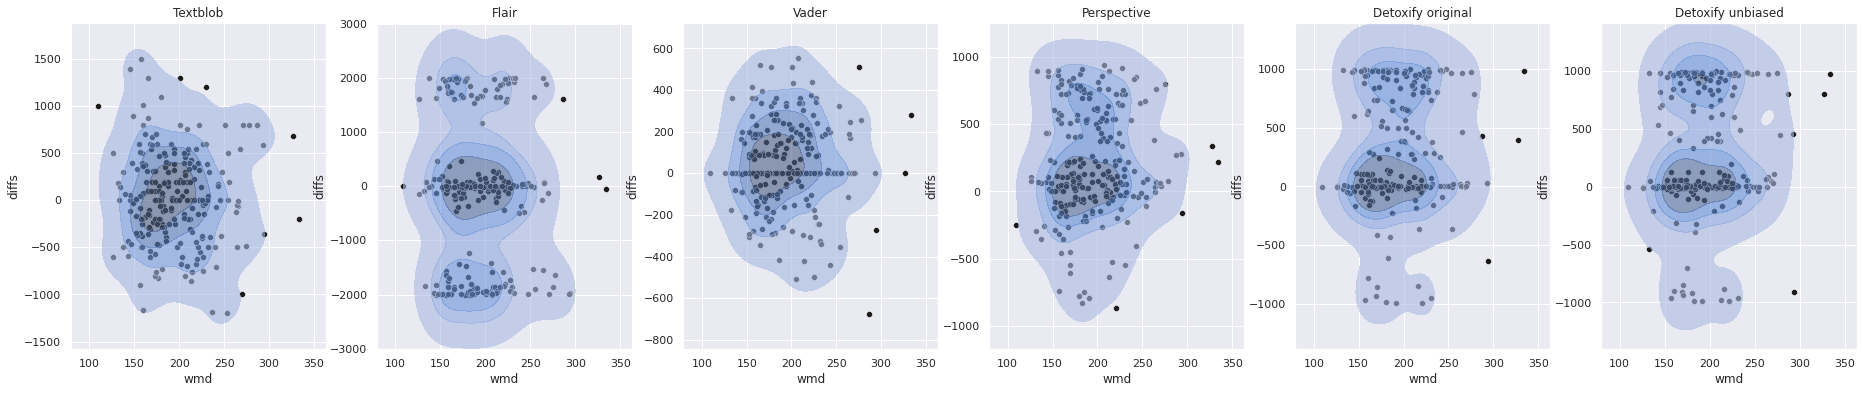

In [8]:
fig, axs = plt.subplots(1, 6, figsize=(32, 6))

for i, model in enumerate([
    "textblob",
    "flair",
    "vader",
    "perspective",
    "detoxify_original",
    "detoxify_unbiased",
]):
    df_tmp = df[["wmd", f"{model}_score_black", f"{model}_score"]].copy()
    df_tmp.loc[:, "diffs"] = df_tmp[f"{model}_score_black"] - df_tmp[f"{model}_score"]
    df_tmp = df_tmp.drop_duplicates(["wmd", "diffs"]).reset_index(drop=True)

    sns.scatterplot(
        x=df_tmp.wmd,
        y=df_tmp.diffs,
        color="k",
        ax=axs[i],
    )
    sns.kdeplot(
        x=df_tmp.wmd,
        y=df_tmp.diffs,
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        ax=axs[i],
    )
    axs[i].set_title(model.replace('_', ' ').capitalize())

plt.show()